In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv')
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


# DATA PREPROCESSING

In [3]:
dataset['Age'].value_counts()

59    15
63    14
50    14
56    13
54    13
46    12
62    11
68    10
53    10
51     9
47     9
45     9
49     9
60     9
61     8
66     8
52     8
77     8
48     7
71     7
79     6
41     6
64     6
74     6
57     6
65     6
58     6
40     6
42     5
44     5
76     5
84     4
85     4
55     4
69     4
80     4
78     4
43     3
72     3
88     3
73     3
67     3
38     3
75     3
39     3
36     3
29     2
83     2
82     2
70     2
87     2
37     2
89     1
35     1
81     1
32     1
90     1
Name: Age, dtype: int64

**therefore the age colums looks clean**

In [4]:
dataset['Gender'].value_counts()

FEMALE    330
MALE        4
Name: Gender, dtype: int64

In [5]:
(4/334)*100


1.1976047904191618

**So there are only 1.19% male in the given dataset, which we can ignore to avoid imbalanced dataset, however we will try some models at the end like xgboost which works good with imbalanced dataset**

In [6]:
dataset['Protein1'].isna().sum()

0

In [7]:
dataset['Protein2'].isna().sum()

0

In [8]:
dataset['Protein3'].isna().sum()

0

In [9]:
dataset['Protein4'].isna().sum()

0

### Therefore, protien colums look clean without any non integer and null valuess

In [10]:
dataset['Tumour_Stage'].unique()

array(['II', 'I', 'III'], dtype=object)

### tumour stage also contains clean data of 3 types

In [11]:
dataset['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma',
       'Mucinous Carcinoma'], dtype=object)

### Histology also contains 3 types of species without any empty values

In [12]:
dataset['ER status'].value_counts()

Positive    334
Name: ER status, dtype: int64

In [13]:
dataset['PR status'].value_counts()

Positive    334
Name: PR status, dtype: int64

In [14]:
dataset['HER2 status'].value_counts()

Negative    305
Positive     29
Name: HER2 status, dtype: int64

### From here we can see that Er status and Pr status is always positive for every value so we can ignore them in analysizing the data

In [15]:
dataset=dataset.drop(['ER status','PR status'],axis=1)

In [16]:
dataset['Surgery_type'].value_counts()

Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: Surgery_type, dtype: int64

### surgery type column also looks clean

## For date of surgery and date of last visit

In [17]:
dataset['Date_of_Surgery'] = pd.to_datetime(dataset['Date_of_Surgery'])
dataset['Date_of_Last_Visit'] = pd.to_datetime(dataset['Date_of_Last_Visit'])
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,2018-05-20,2018-08-26,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,2018-04-26,2019-01-25,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,2018-11-16,2020-07-28,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive


## calculating difference of days between last visit and surgery

In [18]:
dataset['difference'] = (dataset['Date_of_Last_Visit'] - dataset['Date_of_Surgery']).dt.days
dataset['difference'] = dataset['difference']/30
dataset.head()   


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,difference
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,2018-05-20,2018-08-26,Alive,3.266667
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,2018-04-26,2019-01-25,Dead,9.133333
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive,19.766667
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,2018-11-16,2020-07-28,Alive,20.666667
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive,0.800000


### we can drop ther date of surgery and date of last visit now as we have found out the difference

In [19]:
dataset=dataset.drop(['Date_of_Surgery','Date_of_Last_Visit'],axis=1)
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,difference
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,Alive,3.266667
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,9.133333
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Alive,19.766667
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,Alive,20.666667
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Alive,0.800000


In [20]:
dataset['Patient_Status'].value_counts()
dataset['Patient_Status'].unique()

array(['Alive', 'Dead', nan], dtype=object)

In [21]:
dataset = dataset.dropna(subset=['Patient_Status'])

In [22]:
dataset.shape

(321, 12)

In [23]:
col = dataset.pop('difference')
col
dataset.insert(10, 'difference', col)
dataset

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,3.266667,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,9.133333,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,19.766667,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,20.666667,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,0.800000,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,14.566667,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Modified Radical Mastectomy,9.066667,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Negative,Simple Mastectomy,6.633333,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Negative,Lumpectomy,0.300000,Alive


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender']= le.fit_transform(dataset['Gender'])
dataset['HER2 status']= le.fit_transform(dataset['HER2 status'])
dataset['Patient_Status']= le.fit_transform(dataset['Patient_Status'])
#dataset['Tumour_Stage']= le.fit_transform(dataset['Tumour_Stage'])
dataset

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,0,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,0,Other,3.266667,0
1,54,0,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,0,Other,9.133333,1
2,63,0,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,0,Lumpectomy,19.766667,0
3,78,0,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,0,Other,20.666667,0
4,42,0,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,1,Lumpectomy,0.800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,1,Lumpectomy,14.566667,0
330,41,0,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,1,Modified Radical Mastectomy,9.066667,0
331,54,0,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,0,Simple Mastectomy,6.633333,1
332,74,0,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,0,Lumpectomy,0.300000,0


In [25]:
dataset['difference'].unique()

array([  3.26666667,   9.13333333,  19.76666667,  20.66666667,
         0.8       ,   7.86666667,   7.83333333,  11.53333333,
        18.3       ,  13.23333333,  10.13333333,  24.23333333,
         0.7       ,   2.66666667,   3.5       ,   5.6       ,
         7.5       ,  18.2       ,  10.7       ,  15.        ,
        13.66666667,  20.26666667,  51.96666667,  10.53333333,
        11.1       ,  11.8       ,   6.16666667,   1.9       ,
         7.96666667,  23.56666667,   4.46666667,   3.56666667,
        14.03333333,   2.83333333,   1.        ,  10.8       ,
         4.66666667,   8.93333333,   1.33333333,  15.5       ,
        11.93333333,  27.1       ,   9.73333333,  13.2       ,
        22.16666667,  10.83333333,   8.63333333,  18.36666667,
         9.1       ,  16.73333333,   2.43333333,  13.06666667,
        25.56666667,   9.9       ,  22.46666667,  32.1       ,
         5.36666667,  18.33333333,  62.93333333,  14.1       ,
        25.36666667,  26.06666667,   2.5       ,  12.26

def handle_difference(value):
        value=str(value).split(' ')
        value=value[0]
        if value!='NaT':
            return float(value)
        elif value=='NaT':
            val=(dataset['difference'].sum())
            return val
        
    

dataset['difference1']=dataset['difference'].apply(handle_difference)
dataset.head()


In [26]:
dataset['difference'].unique()

array([  3.26666667,   9.13333333,  19.76666667,  20.66666667,
         0.8       ,   7.86666667,   7.83333333,  11.53333333,
        18.3       ,  13.23333333,  10.13333333,  24.23333333,
         0.7       ,   2.66666667,   3.5       ,   5.6       ,
         7.5       ,  18.2       ,  10.7       ,  15.        ,
        13.66666667,  20.26666667,  51.96666667,  10.53333333,
        11.1       ,  11.8       ,   6.16666667,   1.9       ,
         7.96666667,  23.56666667,   4.46666667,   3.56666667,
        14.03333333,   2.83333333,   1.        ,  10.8       ,
         4.66666667,   8.93333333,   1.33333333,  15.5       ,
        11.93333333,  27.1       ,   9.73333333,  13.2       ,
        22.16666667,  10.83333333,   8.63333333,  18.36666667,
         9.1       ,  16.73333333,   2.43333333,  13.06666667,
        25.56666667,   9.9       ,  22.46666667,  32.1       ,
         5.36666667,  18.33333333,  62.93333333,  14.1       ,
        25.36666667,  26.06666667,   2.5       ,  12.26

 # DATA VISUALISATION

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


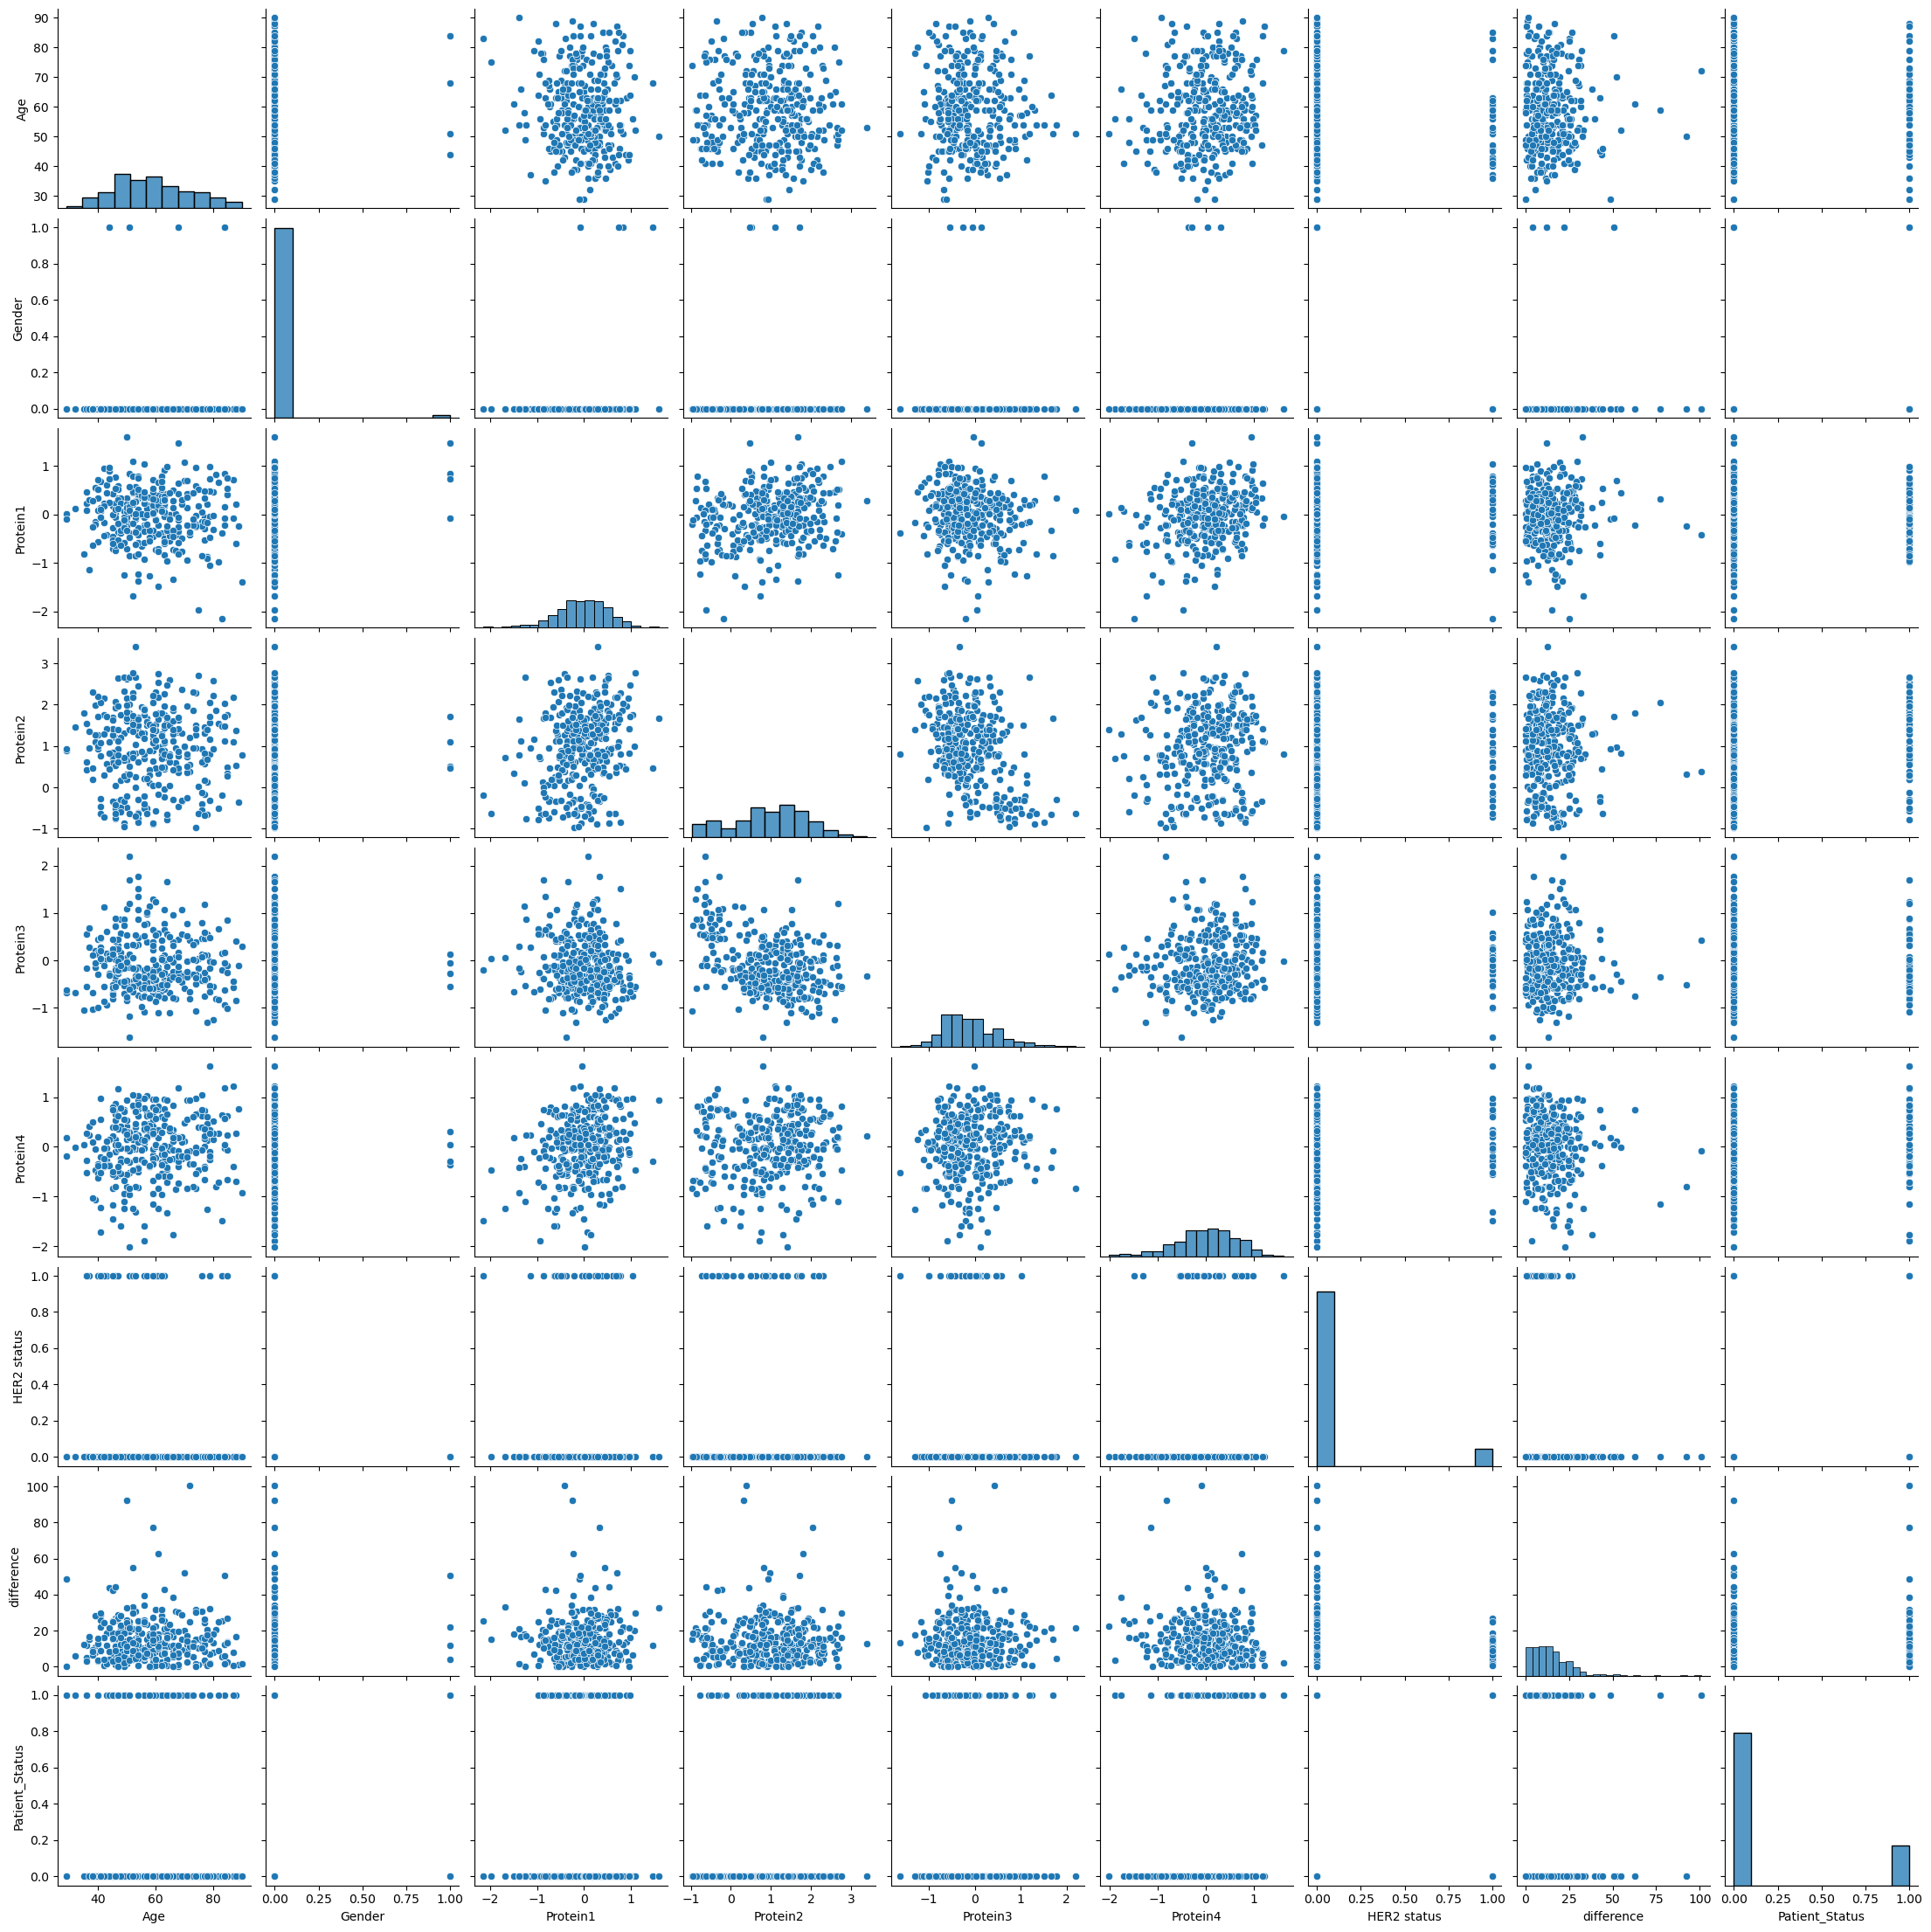

In [27]:
sns.pairplot(dataset)

/tmp/ipykernel_32/2676893432.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

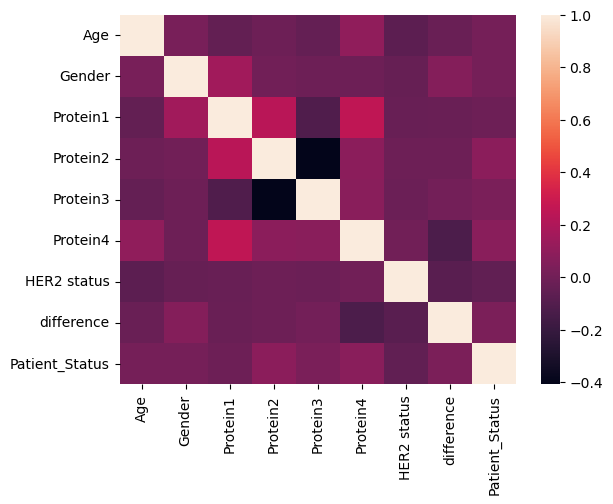

In [28]:
sns.heatmap(dataset.corr())

### This shows some correlation:
### 1)Between Protien 1 and Protien 2
### 2)Between Protien 1 and Protien 4
### 3)between Protien 1 and Gender

<Axes: xlabel='count', ylabel='Tumour_Stage'>

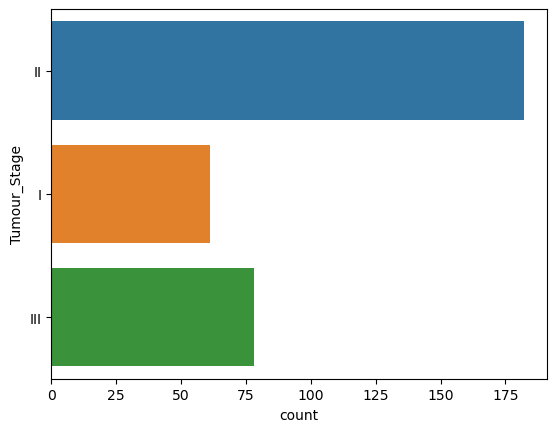

In [29]:
sns.countplot(y=dataset['Tumour_Stage'])

### This shows that maximum cases are of tumour stage 2

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Lumpectomy'),
  Text(2, 0, 'Modified Radical Mastectomy'),
  Text(3, 0, 'Simple Mastectomy')])

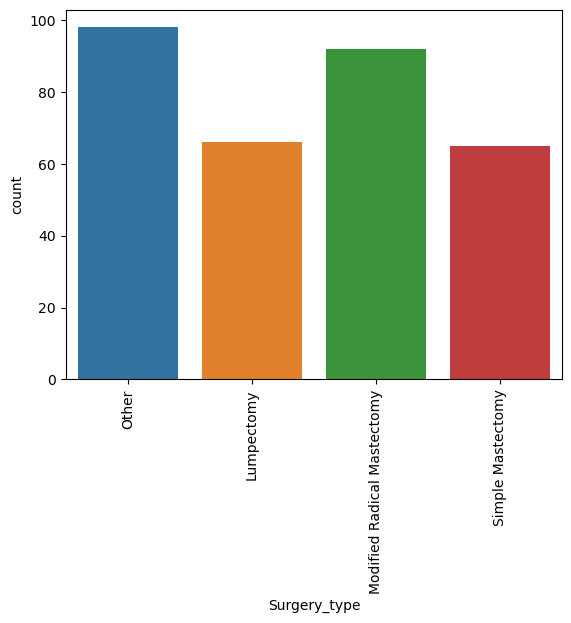

In [30]:
sns.countplot(x=dataset['Surgery_type'])
plt.xticks(rotation=90)

### Leading category amongst all is Modified radial Mastectomy

<Axes: xlabel='HER2 status', ylabel='count'>

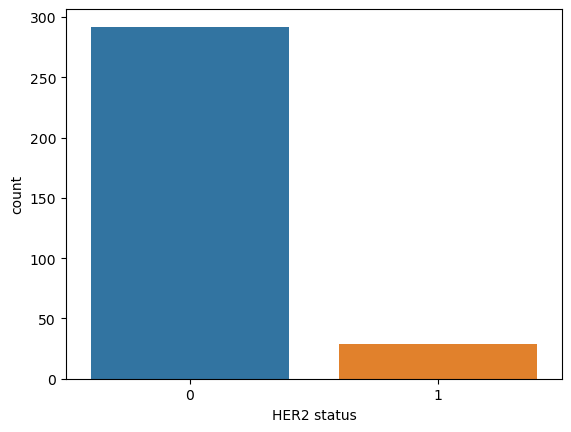

In [31]:
sns.countplot(x=dataset['HER2 status'])


### More negative HER2 status than positive

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


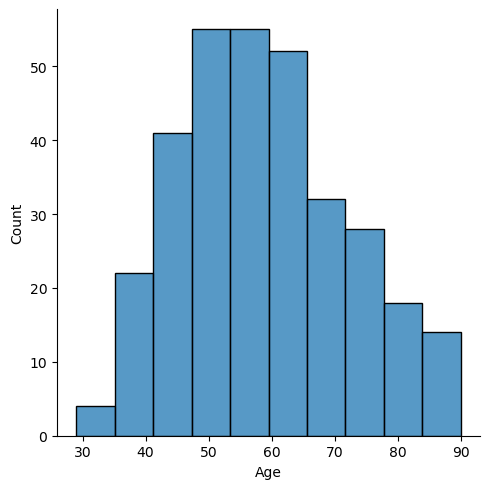

In [32]:
sns.displot(dataset['Age'],bins=10)

### Maximum people from age 50-60 are likely to have cancer

In [33]:
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,0,Other,3.266667,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,0,Other,9.133333,1
2,63,0,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,0,Lumpectomy,19.766667,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,0,Other,20.666667,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,1,Lumpectomy,0.800000,0


(50.0, 65.0)

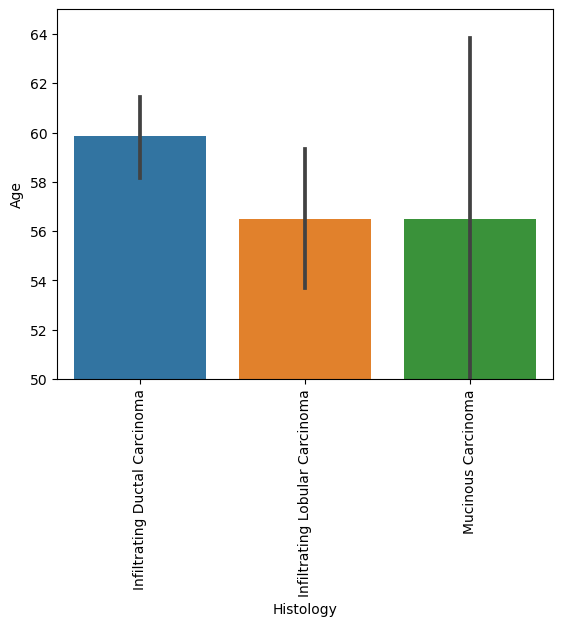

In [34]:
sns.barplot(data=dataset,x='Histology',y='Age')
plt.xticks(rotation=90)
plt.ylim(50,65)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Lumpectomy'),
  Text(2, 0, 'Modified Radical Mastectomy'),
  Text(3, 0, 'Simple Mastectomy')])

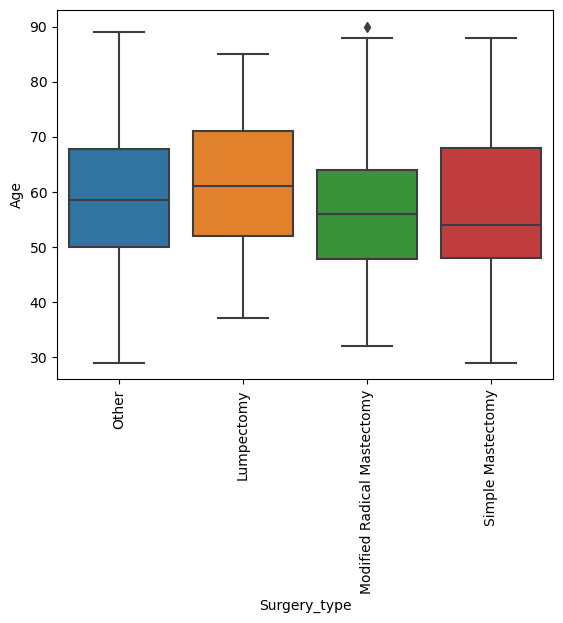

In [35]:
sns.boxplot(data=dataset,x='Surgery_type',y='Age')
plt.xticks(rotation=90)
##plt.ylim(50,65)

### This tells us that Simple mastectomy is usually done by younger people and Lumpectomy is usally done by elder people

<Axes: xlabel='Protein1', ylabel='Protein2'>

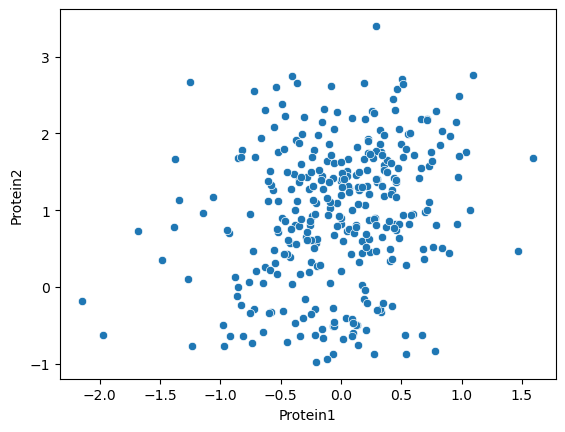

In [36]:
sns.scatterplot(x=dataset['Protein1'],y=dataset['Protein2'])

<Axes: xlabel='Protein1', ylabel='Protein4'>

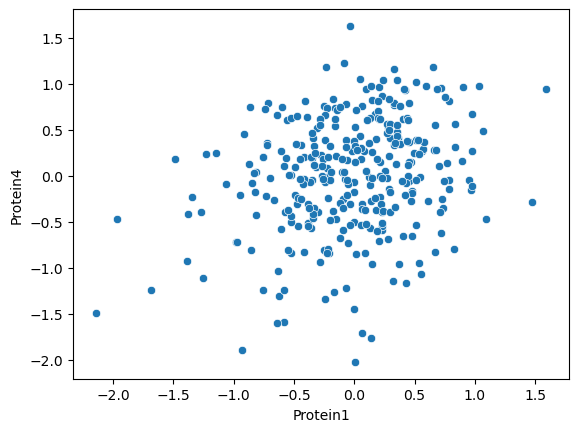

In [37]:
sns.scatterplot(x=dataset['Protein1'],y=dataset['Protein4'])

## We have used scatter plot for only protien (1 and 2) and protien(1 and 4) because of the correlation seen in heatmap

<Axes: xlabel='difference', ylabel='Age'>

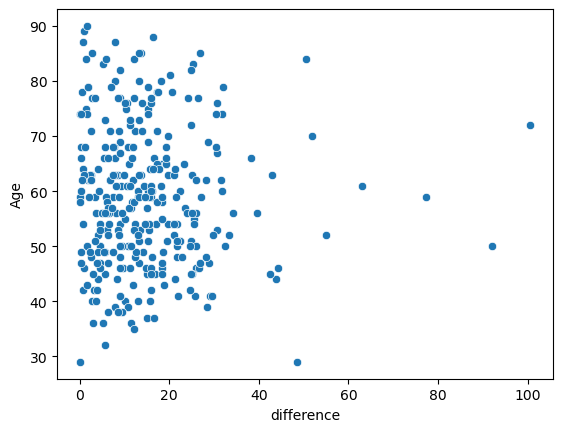

In [38]:
sns.scatterplot(x=dataset['difference'],y=dataset['Age'])

<Axes: xlabel='Tumour_Stage', ylabel='difference'>

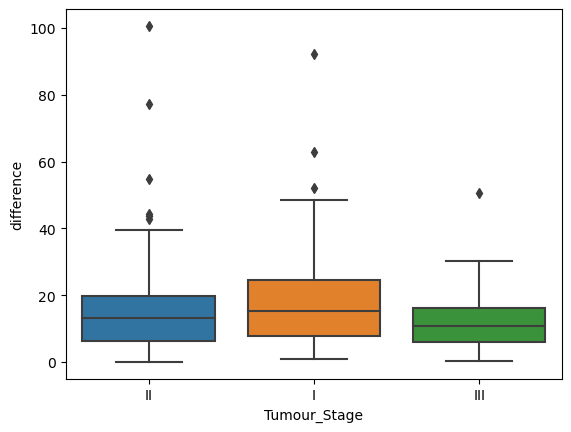

In [39]:
sns.boxplot(x=dataset['Tumour_Stage'],y=dataset['difference'])

### Tumour stage 1 has a higher mean survival days compared to others which is obvious and data supports it

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Lumpectomy'),
  Text(2, 0, 'Modified Radical Mastectomy'),
  Text(3, 0, 'Simple Mastectomy')])

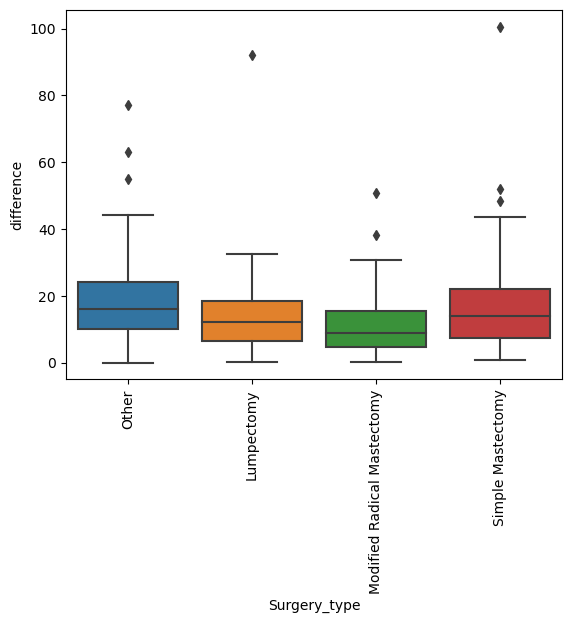

In [40]:
sns.boxplot(x=dataset['Surgery_type'],y=dataset['difference'])
plt.xticks(rotation=90)

## This shows that Simple Mastectomy has greater survival time and Modified Radial Mastectomy has lesser survival time acc to the given dataset

# ML TO PREDICT WHETHER THE PATIENT WILL BE ALIVE OR NO

### Since, we have only 1.19% male in the given dataset, it makes the dataset imbalanced, therefore we drop the male values to have more accurate predictions (Though models like xgboost catboost etc assign weights to the indepent variable to give more accurate predictions but we will just drop male values)

In [41]:
dataset.shape

(321, 12)

In [42]:
dataset = dataset.drop(dataset[dataset['Gender'] == 1].index)

In [43]:
dataset.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,0,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,0,Other,3.266667,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,0,Other,9.133333,1
2,63,0,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,0,Lumpectomy,19.766667,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,0,Other,20.666667,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,1,Lumpectomy,0.800000,0


In [44]:
dataset.tail()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
329,59,0,0.024598,1.40050,0.024751,0.28032,II,Infiltrating Ductal Carcinoma,1,Lumpectomy,14.566667,0
330,41,0,0.100120,-0.46547,0.472370,-0.52387,I,Infiltrating Ductal Carcinoma,1,Modified Radical Mastectomy,9.066667,0
331,54,0,0.753820,1.64250,-0.332850,0.85786,II,Infiltrating Ductal Carcinoma,0,Simple Mastectomy,6.633333,1
332,74,0,0.972510,1.42680,-0.366570,-0.10782,II,Infiltrating Lobular Carcinoma,0,Lumpectomy,0.300000,0
333,66,0,0.286380,1.39980,0.318830,0.83605,II,Infiltrating Ductal Carcinoma,0,Modified Radical Mastectomy,6.233333,1


In [45]:
dataset.shape

(317, 12)

In [46]:
dataset=dataset.drop(['Gender'],axis=1)

### Applying label encoding to tumour stage, histology, surgery type

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Tumour_Stage'] = le.fit_transform(dataset['Tumour_Stage'])

dataset['Histology'] = le.fit_transform(dataset['Histology'])

dataset['Surgery_type'] = le.fit_transform(dataset['Surgery_type'])

In [48]:
dataset.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,0.95256,2.15000,0.007972,-0.048340,1,0,0,2,3.266667,0
1,54,0.00000,1.38020,-0.498030,-0.507320,1,0,0,2,9.133333,1
2,63,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,19.766667,0
3,78,-0.87618,0.12943,-0.370380,0.132190,0,0,0,2,20.666667,0
4,42,0.22611,1.74910,-0.543970,-0.390210,1,0,1,0,0.800000,0


In [49]:
dataset['Patient_Status'].value_counts()

0    252
1     65
Name: Patient_Status, dtype: int64

In [50]:
dataset['difference'].isnull().sum()

4

In [51]:
dataset['difference'].fillna(dataset['difference'].mean(),inplace=True)

In [52]:
dataset['difference'].isnull().sum()

0

## Splitting dependent and independent variable in X and y

In [53]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting into training set and test set

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [57]:
y_pred = classifier1.predict(X_test)


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        50
           1       0.00      0.00      0.00        14

    accuracy                           0.78        64
   macro avg       0.39      0.50      0.44        64
weighted avg       0.61      0.78      0.69        64



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[50  0]
 [14  0]]


0.78125

### K Fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.85 %
Standard Deviation: 1.02 %


## Applying SVM

In [61]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [62]:
y_pred = classifier2.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        50
           1       0.00      0.00      0.00        14

    accuracy                           0.78        64
   macro avg       0.39      0.50      0.44        64
weighted avg       0.61      0.78      0.69        64



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[50  0]
 [14  0]]


0.78125

## K Fold Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.85 %
Standard Deviation: 1.02 %


## Applying Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [67]:
y_pred = classifier3.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        50
           1       0.00      0.00      0.00        14

    accuracy                           0.78        64
   macro avg       0.39      0.50      0.44        64
weighted avg       0.61      0.78      0.69        64



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[50  0]
 [14  0]]


0.78125

## K Fold Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.65 %
Standard Deviation: 2.69 %


## Applying Artificial Nueral Network

In [71]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [72]:
ann = tf.keras.models.Sequential()

In [73]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [74]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [75]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [76]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [77]:
ann.fit(X_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 0.6457 - accuracy: 0.6917
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.7273
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7708
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6042 - accuracy: 0.7905
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.7984
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.7984
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7984
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7984
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.7984
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.7984
Epoch 11/

In [78]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 3ms/step


In [79]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[50  0]
 [14  0]]


0.78125

## Applying XGBoost


In [80]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [81]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[48  2]
 [12  2]]


0.78125

In [82]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.74 %
Standard Deviation: 3.33 %


## Applying CatBoost

In [83]:
!pip install catboost

In [84]:
from catboost import CatBoostClassifier
classifier5 = CatBoostClassifier()
classifier5.fit(X_train, y_train)

Learning rate set to 0.005729
0:	learn: 0.6904778	total: 59.9ms	remaining: 59.8s
1:	learn: 0.6875355	total: 61.9ms	remaining: 30.9s
2:	learn: 0.6846356	total: 63.6ms	remaining: 21.1s
3:	learn: 0.6818841	total: 65.3ms	remaining: 16.3s
4:	learn: 0.6788640	total: 67ms	remaining: 13.3s
5:	learn: 0.6764752	total: 68.7ms	remaining: 11.4s
6:	learn: 0.6739114	total: 71.3ms	remaining: 10.1s
7:	learn: 0.6716425	total: 72.1ms	remaining: 8.94s
8:	learn: 0.6685011	total: 73.7ms	remaining: 8.12s
9:	learn: 0.6658444	total: 75.5ms	remaining: 7.47s
10:	learn: 0.6630916	total: 77.5ms	remaining: 6.97s
11:	learn: 0.6607666	total: 79.3ms	remaining: 6.53s
12:	learn: 0.6577864	total: 80.8ms	remaining: 6.13s
13:	learn: 0.6549495	total: 82.1ms	remaining: 5.78s
14:	learn: 0.6525068	total: 83.4ms	remaining: 5.48s
15:	learn: 0.6500594	total: 85ms	remaining: 5.23s
16:	learn: 0.6479719	total: 86ms	remaining: 4.97s
17:	learn: 0.6457525	total: 86.7ms	remaining: 4.73s
18:	learn: 0.6434872	total: 88ms	remaining: 4.54s


In [85]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[48  2]
 [12  2]]


0.78125

In [86]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.00547
0:	learn: 0.6908241	total: 2.39ms	remaining: 2.39s
1:	learn: 0.6879021	total: 3.82ms	remaining: 1.9s
2:	learn: 0.6851414	total: 5.38ms	remaining: 1.79s
3:	learn: 0.6823599	total: 6.88ms	remaining: 1.71s
4:	learn: 0.6797305	total: 8.33ms	remaining: 1.66s
5:	learn: 0.6768570	total: 9.79ms	remaining: 1.62s
6:	learn: 0.6746203	total: 11.2ms	remaining: 1.59s
7:	learn: 0.6724551	total: 12ms	remaining: 1.49s
8:	learn: 0.6693969	total: 13.7ms	remaining: 1.51s
9:	learn: 0.6671300	total: 15.3ms	remaining: 1.51s
10:	learn: 0.6644203	total: 16.8ms	remaining: 1.51s
11:	learn: 0.6619015	total: 18.3ms	remaining: 1.51s
12:	learn: 0.6590760	total: 19.8ms	remaining: 1.5s
13:	learn: 0.6561479	total: 21.2ms	remaining: 1.49s
14:	learn: 0.6535362	total: 23ms	remaining: 1.51s
15:	learn: 0.6508933	total: 24.6ms	remaining: 1.51s
16:	learn: 0.6488438	total: 25.7ms	remaining: 1.49s
17:	learn: 0.6467265	total: 26.6ms	remaining: 1.45s
18:	learn: 0.6445688	total: 28.1ms	remaining: 1.45s

In [87]:
dataset.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,0.95256,2.15000,0.007972,-0.048340,1,0,0,2,3.266667,0
1,54,0.00000,1.38020,-0.498030,-0.507320,1,0,0,2,9.133333,1
2,63,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,19.766667,0
3,78,-0.87618,0.12943,-0.370380,0.132190,0,0,0,2,20.666667,0
4,42,0.22611,1.74910,-0.543970,-0.390210,1,0,1,0,0.800000,0


In [88]:
dataset['Protein4'].max()

1.6299

In [89]:
age_list=list(np.arange(5,100))
Protein1_list=list(np.arange(-3.0,1.7))
Protein2_list=list(np.arange(-1.0,3.5))
Protein3_list=list(np.arange(-1.8,2.4))
Protein4_list=list(np.arange(-2.3,1.8))
Tumour_Stage_list=list(dataset['Tumour_Stage'].unique())
Histology_list=list(dataset['Histology'].unique())
HER2_status_list=list(dataset['HER2 status'].unique())
Surgery_type_list=list(dataset['Surgery_type'].unique())
difference_list_in_months=list(np.arange(1,110))

In [90]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 40.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.1-py3-none-any.whl size=5596 sha256=66e1005157e77ce949c90b706ac89b975b019acc308da57997f4d2033c03397f
  Stored in directory: /root/.cache/pip/wheels/01/a6/d1/1c0828c304a4283b2c1639a09ad86f83d7c487ef34c6b4a1bf
Successfully built ffmpy


In [91]:
dataset.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,difference,Patient_Status
0,42,0.95256,2.15000,0.007972,-0.048340,1,0,0,2,3.266667,0
1,54,0.00000,1.38020,-0.498030,-0.507320,1,0,0,2,9.133333,1
2,63,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,19.766667,0
3,78,-0.87618,0.12943,-0.370380,0.132190,0,0,0,2,20.666667,0
4,42,0.22611,1.74910,-0.543970,-0.390210,1,0,1,0,0.800000,0


In [ ]:
import gradio as gr
import re

def predictor(age,protein1,protein2,protein3,protein4,tumour_stage,histology,HER2status,surgery_type,difference):
    pred=classifier2.predict(np.array([[int(age),float(protein1),float(protein2),float(protein3),float(protein4),tumour_stage,histology,HER2status,surgery_type,float(difference)]]))
    if(pred==0):
      result="The patient is likely to be alive"
    else:
      result="The patient is likely to NOT be alive"
    return result


input_list=[gr.Textbox(label="Age"),
            gr.Textbox(label="Protein 1"),
            gr.Textbox(label="Protein 2"),
            gr.Textbox(label="Protein 3"),
            gr.Textbox(label="Protein 4"),
            gr.Dropdown(Tumour_Stage_list, label="Tumour_Stage"),
            gr.Dropdown(Histology_list, label="Histology"),
            gr.Dropdown(HER2_status_list, label="HER2 status"),
            gr.Dropdown(Surgery_type_list, label="Surgery_type"),
            gr.Textbox(label="difference", placeholder="Please input in months"),
            ]
app = gr.Interface(fn = predictor, title="Breast Cancer Survival Rate predictor", inputs=input_list, outputs="text")
app.queue().launch(share=True,debug=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://47245fc91cedc507eb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
